In [3]:
addpath /usr/lib/dynare/matlab

In [4]:
%%file rck.mod
// rck.mod
// ラムゼイモデル

// 変数等の宣言
var c k; // 内生変数
varexo a; // 外生変数
parameters alpha delta beta; // パラメータ

// パラメータに値を代入
alpha = 1/3;
delta = 0.1;
beta = 0.96;
Abar = 1.0;

// 定常状態の値（解析的）
kss = (alpha*beta*Abar/(1-beta*(1-delta)))^(1/(1-alpha));
yss = Abar*kss^alpha;
css = yss - delta*kss;
ykss = yss/kss;

// モデル
model;

1/c = beta/c(+1)*(1+alpha*exp(a(+1))*k^(alpha-1)-delta);
c + k = exp(a)*k(-1)^alpha + (1-delta)*k(-1);

end;

// 定常状態を数値的に求める
// 初期値
initval;
k = 1.0;
c = 1.0;
end;

steady;

// シミュレーション
// シミュレーションの初期値
initval;
k = 0.2;
end;

simul(periods=150);

// 位相図
figure;
plot(k(1:100),c(2:101),'*');
hold on;
kvec = linspace(0.1,5.0,101)';
gkvec = kvec.^alpha - delta*kvec;
plot(kvec,gkvec);
plot([kss kss],[0 2.0]);


Created file 'C:\Users\takeki\rck.mod'.


Using 64-bit preprocessor
Starting Dynare (version 4.6.2).
Calling Dynare with arguments: none
Starting preprocessing of the model file ...
Found 2 equation(s).
Evaluating expressions...done
Computing static model derivatives (order 1).
Computing dynamic model derivatives (order 1).
Processing outputs ...
done
Preprocessing completed.


STEADY-STATE RESULTS:

c 		 1.17301
k 		 3.60923

--------------------------------------------------------
MODEL SIMULATION:

Iter: 1,	 err. = 0.681741,	 time = 0.0655975
Iter: 2,	 err. = 1.17437,	 time = 0.0594711
Iter: 3,	 err. = 0.434613,	 time = 0.0576248
Iter: 4,	 err. = 0.0823069,	 time = 0.0571136
Iter: 5,	 err. = 0.0376511,	 time = 0.0593109
Iter: 6,	 err. = 0.0130484,	 time = 0.057251
Iter: 7,	 err. = 0.000734719,	 time = 0.0574265
Iter: 8,	 err. = 1.57325e-06,	 time = 0.0574188

Total time of simulation: 0.478691.
--------------------------------------------------------

Perfect foresight solution found.

Total computing time : 0h00m01s
Note: 

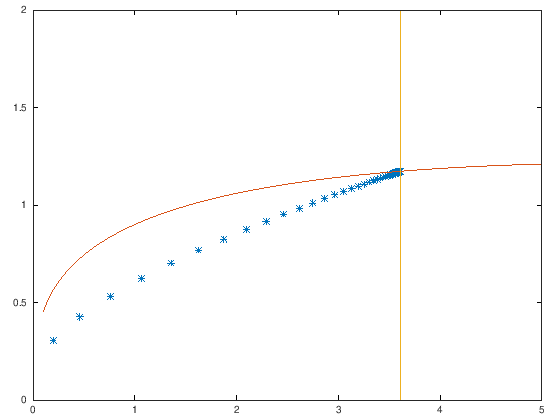

In [6]:
dynare rck